<a href="https://colab.research.google.com/github/JonathanSum/pytorch-Deep-Learning_colab/blob/master/Ch5AutoGrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/deep-learning-with-pytorch/dlwpt-code.git
!git clone https://github.com/JonathanSum/JonathanSum.git

Cloning into 'dlwpt-code'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 703 (delta 7), reused 2 (delta 1), pack-reused 686
Receiving objects: 100% (703/703), 185.80 MiB | 16.88 MiB/s, done.
Resolving deltas: 100% (303/303), done.
Checking out files: 100% (228/228), done.
Cloning into 'JonathanSum'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 262 (delta 33), reused 0 (delta 0), pack-reused 178
Receiving objects: 100% (262/262), 27.96 MiB | 10.69 MiB/s, done.
Resolving deltas: 100% (132/132), done.


In [2]:
import torch

In [3]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [4]:
def model(t_u, w, b):
    return w * t_u + b

In [5]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [6]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [7]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [8]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")
x

shapes: x: torch.Size([]), y: torch.Size([3, 1])


tensor(1.)

In [9]:
print(f" z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

 z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [10]:
delta = 0.1
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) -
    loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [11]:
learning_rate = 1e-2
w = w- learning_rate * loss_rate_of_change_w

In [12]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) -
    loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
    
b = b- learning_rate * loss_rate_of_change_b

In [13]:
#d loss_fn / d w = (d loss_fn / d t_p) * (d t_p / d w)
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()


In [14]:
#Remembering that d x^2 / d x = 2 x, we get
# In[11]:
def dloss_fn(t_p, t_c):
    dsq_diffs=2* (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [15]:
def model(t_u, w, b):
    return w * t_u  + b

In [16]:
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(tu, w, b):
    return 1.0

In [17]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])


In [18]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad
        if print_params:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [19]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-4,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 323.090515
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540283
Epoch 6, Loss 29.351154
Epoch 7, Loss 29.148884
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105247
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102295
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100466
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097717
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095881
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092216
Epoch 25, Loss 29.091301
Epoch 26, Loss 29.090385
Epoch 27, Loss 29.089464
Epoch 28, Loss 29.088551
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086714
Epoch 31, Loss 29.085804
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083967
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081221
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079390
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077562
Epoch 

tensor([ 0.2327, -0.0438])

In [20]:
t_un = 0.1 * t_u

In [21]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c,
    print_params=False)

tensor([ 2.7553, -2.5162])

In [22]:
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c,
print_params = False)
params

tensor([  5.3671, -17.3012])

In [23]:
print((t_u.numpy()))
print(t_p.detach().numpy())
print(t_c.numpy())
print((t_u.numpy()).shape)

[35.7 55.9 58.2 81.9 56.3 48.9 33.9 21.8 48.4 60.4 68.4]
[35.7 55.9 58.2 81.9 56.3 48.9 33.9 21.8 48.4 60.4 68.4]
[ 0.5 14.  15.  28.  11.   8.   3.  -4.   6.  13.  21. ]
(11,)


In [24]:
model(t_un, *params)

tensor([ 1.8593, 12.7008, 13.9352, 26.6552, 12.9155,  8.9439,  0.8932, -5.6009,
         8.6755, 15.1160, 19.4097])

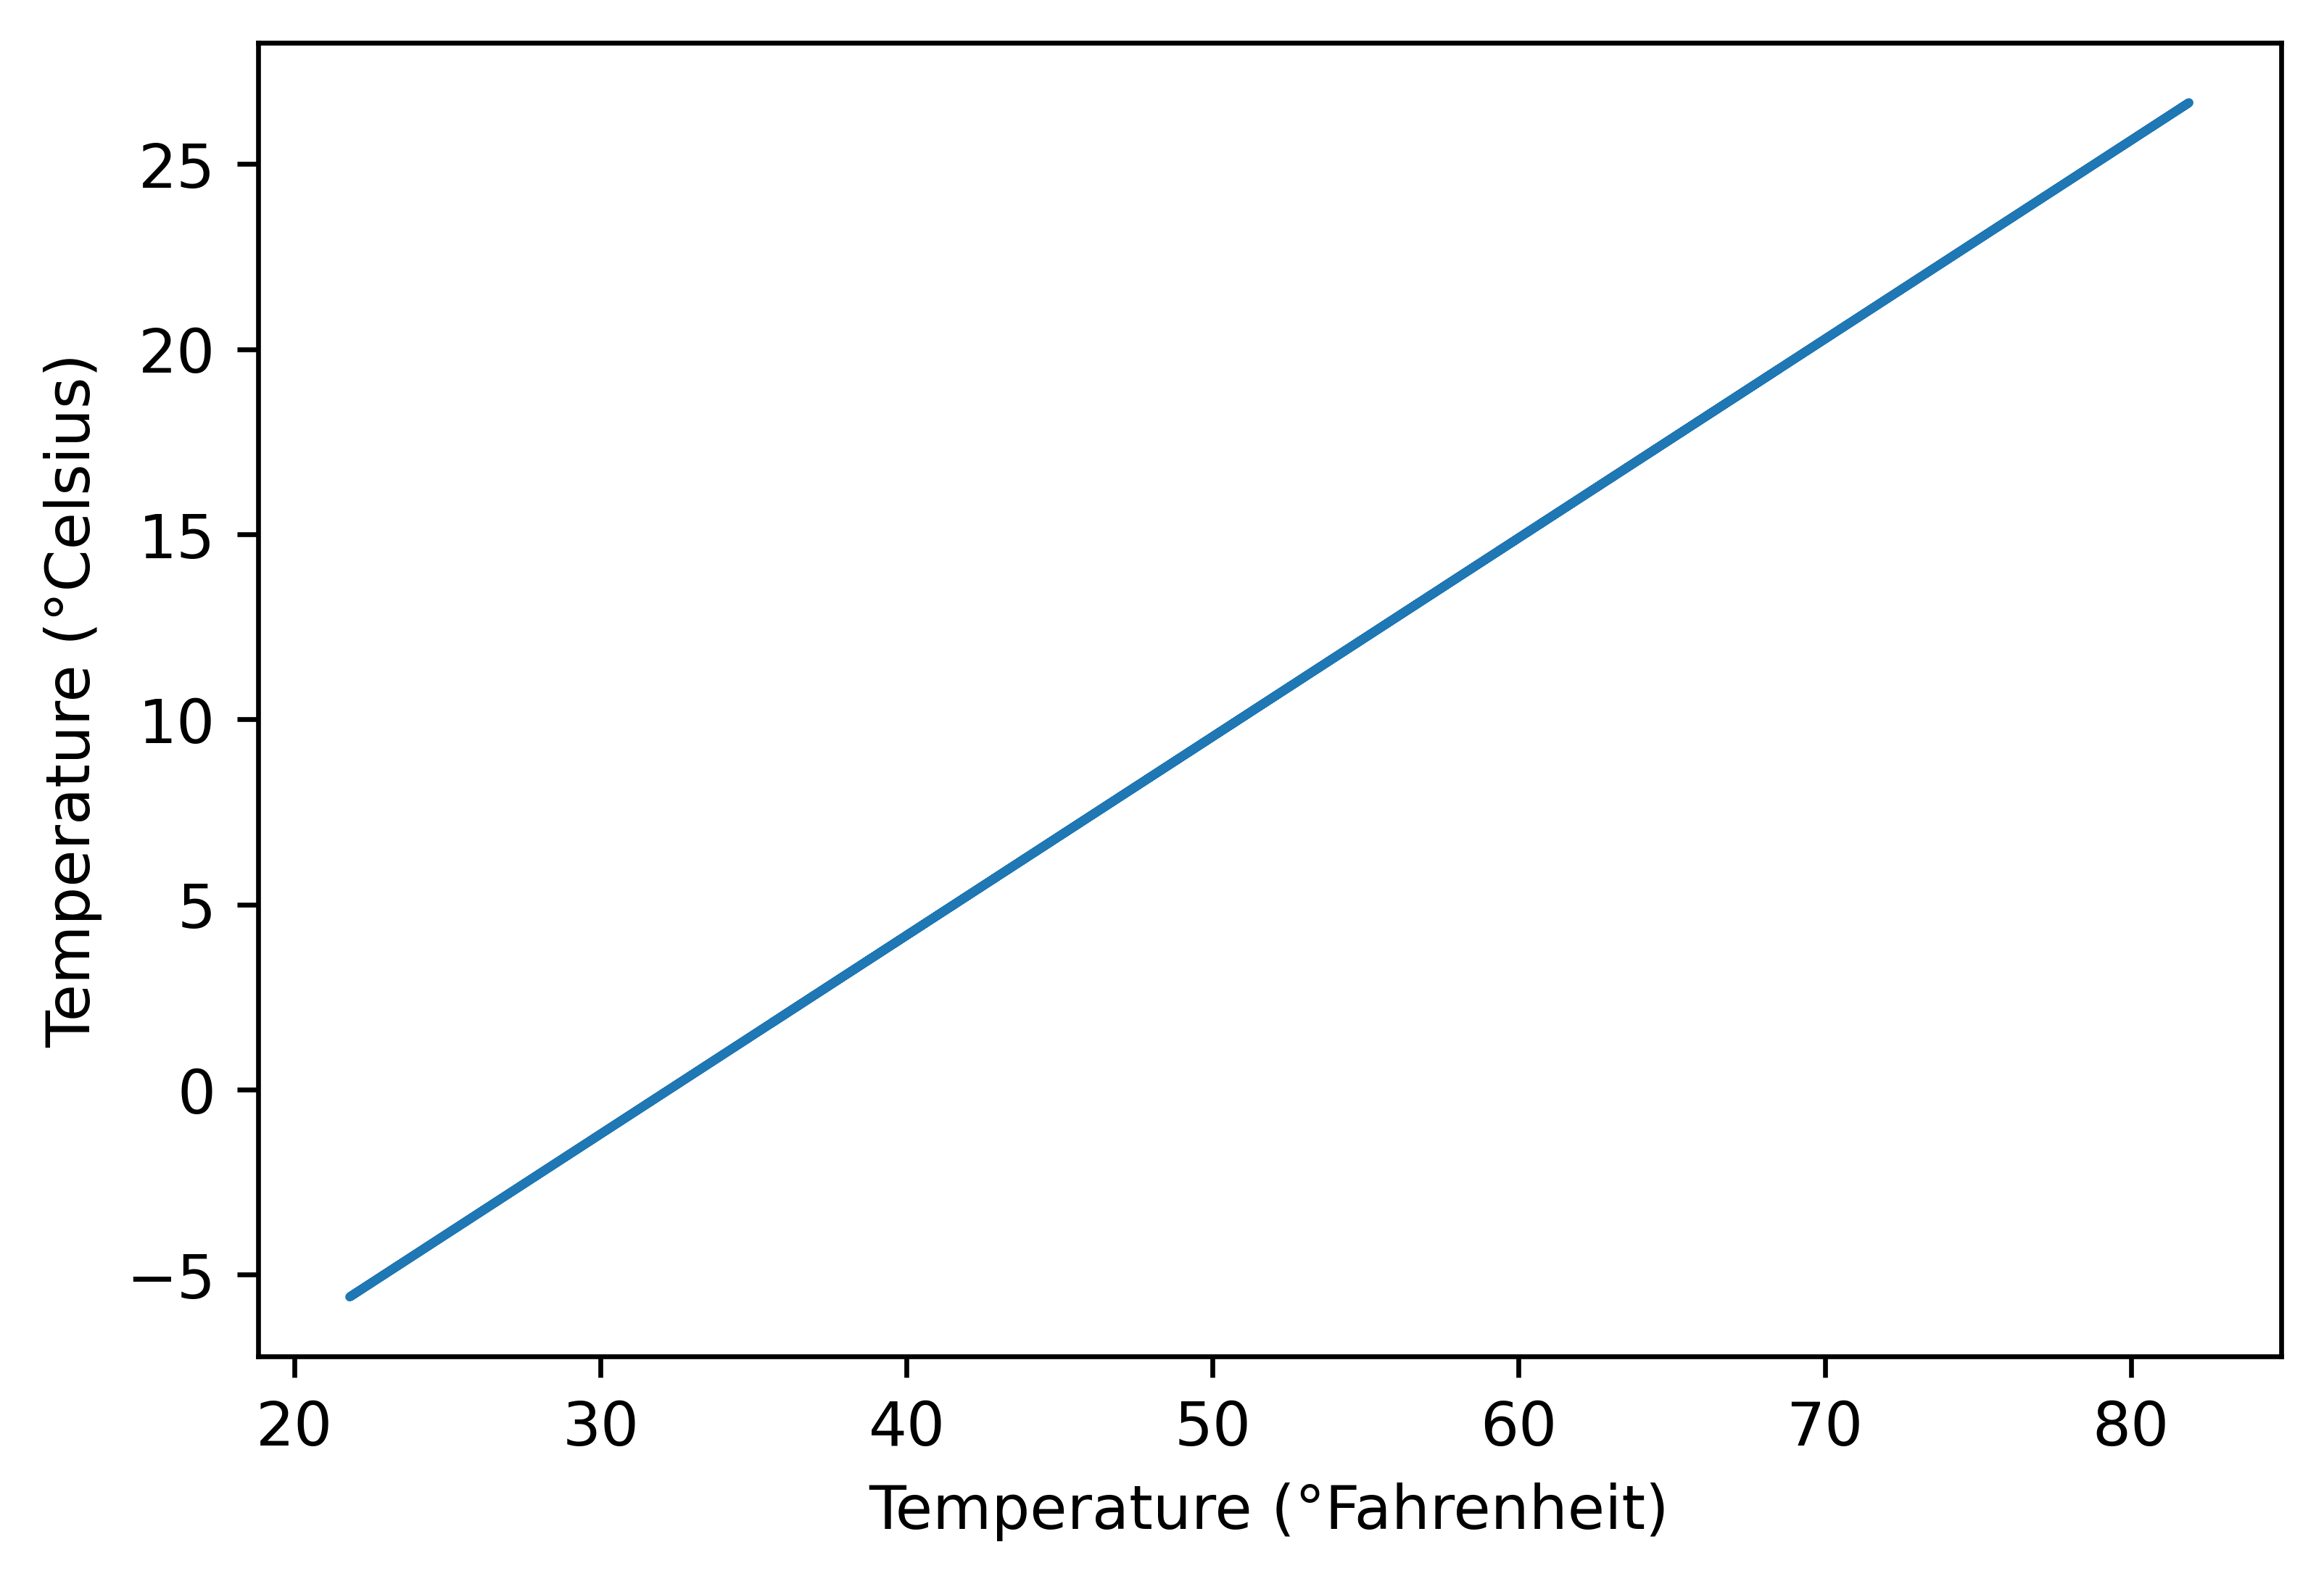

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())

In [26]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [27]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [44]:
params.grad is None

True

In [29]:
t_u

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

We can see Pytorch's auto grad is the same as our hand calculated grad.

In [45]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

In [46]:
params.grad

tensor([4517.2969,   82.6000])

In [32]:
grad = grad_fn(t_u, t_c, model(t_u, *params), *params)

In [33]:
grad

tensor([4517.2964,   82.6000], grad_fn=<StackBackward>)

But now it is not the same. That because it accumulates to be double of the old value, not storing.

In [50]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

In [51]:
params.grad

tensor([9034.5938,  165.2000])

But it can be fixed by this.

In [ ]:
# if params.grad is not None:
#     params.grad.zero_() 

In [52]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()

        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [53]:
training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)